<a href="https://colab.research.google.com/github/changhoon0807/python101/blob/main/1_3_pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자료형: 데이터프레임

1. 넘파이 2차원 리스트/어레이를 입력변수로 하여 생성
2. 칼럼이름과 1차원 리스트/어레이으로 구성된 딕셔너리를 입력변수로 하여 생성

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([[1, 2], [3, 4]])

In [ ]:
df

,0,1
0,1,2
1,3,4


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df)==pd.DataFrame

True

In [ ]:
df.set_index(0)

,1
0,
1,2
3,4


In [ ]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]])

In [ ]:
df

,0,1
0,1,2
1,3,4
2,5,6


In [ ]:
df.columns = ['KOR', 'USA']

In [ ]:
df.index = [17, 18, 19]

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df = pd.DataFrame({'a':[1, 2], 'b':[3, 4]})

In [ ]:
df

,a,b
0,1,3
1,2,4


- 데이터프레임 통계량

In [ ]:
df.mean()

KOR    3.0
USA    4.0
dtype: float64

In [ ]:
df.mean().to_frame('mean')

,mean
KOR,3.0
USA,4.0


In [ ]:
df.apply(['mean', 'median', 'sum', 'std'])  # prod

,KOR,USA
mean,3.0,4.0
median,3.0,4.0
sum,9.0,12.0
std,2.0,2.0


## 슬라이스

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df.loc[18:, :]

,KOR,USA
18,3,4
19,5,6


In [ ]:
df.loc[17, :]

KOR    1
USA    2
Name: 17, dtype: int64

In [ ]:
df.loc[[17]]

,KOR,USA
17,1,2


In [ ]:
df = df.loc[18:, :].copy()

- 값 지정

In [ ]:
df

,KOR,USA
18,3,4
19,5,6


In [ ]:
df.loc[18, 'KOR'] = 0

In [ ]:
df

,KOR,USA
18,0,4
19,5,6


In [ ]:
df.loc[:, 'USA'] = 1

In [ ]:
df

,KOR,USA
18,0,1
19,5,1


In [ ]:
df.loc[:, :] = [[1, 2], [3, 4]]

In [ ]:
df

,KOR,USA
18,1,2
19,3,4


In [ ]:
df = [[1, 2], [3, 4]]

In [ ]:
df

[[1, 2], [3, 4]]

## 멀티인덱스

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
from pandas import MultiIndex as MI

In [ ]:
df.index = MI.from_product([['16', '17'], ['미국', '한국']])

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

In [ ]:
df.index = [':'.join(c).strip() for c in df.index.values]

In [ ]:
df

,pop,gdp
16:미국,1,3
16:한국,2,4
17:미국,3,5
17:한국,4,6


In [ ]:
df.index.str.split(':').tolist()

[['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]

라벨이 주어진 형태에 따라 멀티인덱스 생성 함수를 선택


```
- from_tuples() : [['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]
- from_product() : [['16', '17'], ['미국', '한국']]
- from_arrays() : [['16', '16', '17', '17'], ['미국', '미국', '한국', '한국']]
```

In [ ]:
df.index = MI.from_tuples(df.index.str.split(':').tolist())

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

IndexSlice: 다양한 층위에서 데이터 선택

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df = df.set_index('country', append=True)

In [ ]:
idx = pd.IndexSlice

In [ ]:
df.loc[idx[:, 'USA'], :]

,,pop,gdp
,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.loc[idx[16, 'USA'], :]

pop    1
gdp    3
Name: (16, USA), dtype: int64

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df['pop'].ge(3)]

,country,pop,gdp
17,USA,3,5
17,KOR,4,6


In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df.country.isin(['USA', 'JPN'])]

,country,pop,gdp
16,USA,1,3
17,USA,3,5


- droplevels
- get_level_values
- reorder_levels

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df.index.names = ['yr', 'country']

In [ ]:
df

pop  gdp
yr country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
df.index.get_level_values(0).unique()

Int64Index([16, 17], dtype='int64', name='yr')

In [ ]:
df.index.get_level_values(1).unique()

Index(['USA', 'KOR'], dtype='object', name='country')

In [ ]:
df = df.loc[idx[:, 'USA'], :]

In [ ]:
df

,,pop,gdp
yr,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.index = df.index.droplevel(level = 1)

In [ ]:
df

,pop,gdp
yr,,
16,1,3
17,3,5


## 연습문제

1.  연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성하시오
    - 인덱스 첫번째 레벨은 연도, 두번째 레벨은 국가명, 칼럼 라벨은 [gdp, inf]
    - 경제성장률과 물가상승률은 넘파이 랜덤표본 이용

3.  2018년 이후 국가별 경제성장률과 물가상승률을 보이시오

In [20]:
# import numpy as np

# ex1 = pd.DataFrame({'yr':list(range(2017, 2021)) * ,
#                     'country':['kr'] * 4 + ['us'] * 4 + ['jp'] * 4,
#                     'gdp':np.random.randn(12) + 1,
#                     'inf':np.random.randn(12) + 2})
# ex1 = ex1.set_index()
# ex1 = ex1.sort_index()
# ex1.loc[2018:]

# 연산

In [26]:
# 데이터프레임을 병렬로 표시하기 위한 함수 정의
from IPython.display import display_html
def display_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [62]:
df = pd.DataFrame({'KOR':[1, 3], 'USA':[2, 4]})

In [28]:
df1 = df + 10

In [29]:
df1.columns = ['USA', 'CHN']

In [30]:
display_by_side(df1, df + df1)

USA 
 CHN 
 
 
 
 
 0 
 11 
 12 
 
 
 1 
 13 
 14 
 
 
 
 
 
 
 CHN 
 KOR 
 USA 
 
 
 
 
 0 
 NaN 
 NaN 
 13 
 
 
 1 
 NaN 
 NaN 
 17

In [31]:
display_by_side(df, df.T)

,KOR,USA
0,1,2
1,3,4
,0,1
KOR,1,3
USA,2,4


In [ ]:
df.dot(df.T)

,0,1
0,5,11
1,11,25


In [ ]:
df.T.dot(df)

,KOR,USA
KOR,10,14
USA,14,20


In [ ]:
df.dot(df) # 행과 열의 라벨이 다름

ValueError: ignored

In [ ]:
df1 = pd.DataFrame({'USA':[1, 3], 'CHN':[2, 4]})
df2 = pd.DataFrame({'JPN':[2, 4], 'KOR':[6, 8]})

In [ ]:
display(df1, df2)

,USA,CHN
0,1,2
1,3,4


,JPN,KOR
0,2,6
1,4,8


In [ ]:
pd.concat([df1, df2], axis = 1)

,USA,CHN,JPN,KOR
0,1,2,2,6
1,3,4,4,8


In [ ]:
pd.concat([df1, df2], axis = 0)

,USA,CHN,JPN,KOR
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
0,NaN,NaN,2.0,6.0
1,NaN,NaN,4.0,8.0


## merge, concat



In [ ]:
df2.columns = ['CHN', 'KOR']

In [ ]:
df1.merge(df2, on = 'CHN', how = 'left')

,USA,CHN,KOR
0,1,2,6
1,3,4,8


## add, sub, mul, div

In [68]:
df['Total'] = df.sum(axis = 1) # 각 행의 원소를 모두 더해서 새로운 열 생성
df

,KOR,USA,Total
0,1,2,3.0
1,3,4,7.0


In [36]:
df.div(df.Total, axis = 0)

,KOR,USA,Total
0,0.333333,0.666667,1.0
1,0.428571,0.571429,1.0


## cut

- 숫자 데이터를 범주형 데이터로 변환
- 데이터프레임 값을 미리 정의된 범위(ranges)에 따라 나눌 경우 pd.cut(df.var, ranges) 이용

In [74]:
from numpy.random import randint
df = pd.DataFrame({'a':range(4), 'b':randint(1,10,4)})
df

,a,b
0,0,9
1,1,5
2,2,8
3,3,3


In [52]:
pd.cut(df.b, [0, 5, 10])

0     (0, 5]
1    (5, 10]
2     (0, 5]
3     (0, 5]
Name: b, dtype: category
Categories (2, interval[int64, right]): [(0, 5] < (5, 10]]

In [53]:
df.loc[:, 'c'] = pd.cut(df.b, [0, 5, 10], labels=False) # pd.cut( , , labels=False)는 범주 대신 숫자(구간 순서) 반환

In [44]:
df

,a,b,c
0,0,2,0
1,1,7,1
2,2,2,0
3,3,1,0


## groupby: 특정 열을 기준으로 데이터프레임을 그룹으로 나누어 원하는 작업 수행

In [82]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [83]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [80]:
df.groupby('country').mean()

,pop,gdp
country,,
KOR,3.0,5.0
USA,2.0,4.0


In [81]:
df = df[['pop', 'gdp']]

## 특정 열이 아니라 값이 속한 범주에 따라 그룹지정

In [84]:
df.groupby(pd.cut(df['pop'], [0, 2, 4]))['gdp'].mean()

pop
(0, 2]    3.5
(2, 4]    5.5
Name: gdp, dtype: float64

## lambda 함수
- apply, applymap과 함께 사용

In [ ]:
square = lambda x: x * x

In [ ]:
square(2)

4

## apply/applymap

In [85]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [90]:
df = df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))
df

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [92]:
df.applymap(lambda x: f'{x:.2f}')

,pop,gdp
16,0.10,0.17
16,0.20,0.22
17,0.30,0.28
17,0.40,0.33


## stack/unstack
- 데이터프레임의 데이터 구조를 재구성
- 데이터프레임의 특정 행 또는 열을 다른 축(axis)로 이동할 때,
- 만약 행 또는 열이 멀티인덱스인 경우 이동하려는 행 또는 열의 레벨을 지정

In [95]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

df = df.set_index('country', append=True)
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [96]:
df.unstack(level = 1) # 행을 열로

pop     gdp    
country KOR USA KOR USA
16        2   1   4   3
17        4   3   6   5

In [99]:
df = df.unstack(level = 1)

In [101]:
df.stack(level = 1) # 열을 행으로

pop  gdp
   country          
16 KOR        2    4
   USA        1    3
17 KOR        4    6
   USA        3    5

# 시계열
- 데이터프레임의 인덱스를 DatetimeIndex 자료형으로 지정하면 시계열 빈도 변경(resample), 증가율/차분(pct_change()/diff()
- 특정 연도/월 선택 등 시계열 분석에 유용한 기능 제공

In [108]:
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'])

In [109]:
df

,con,gdp
0,8,12
1,17,9
2,2,15
3,10,5
4,7,2
5,1,9
6,14,15
7,12,6
8,14,11
9,3,3


## pd.date_range(start=, end=, freq=), pd.to_datetime()

In [110]:
df.index = pd.date_range(start = '2017-3-31', end = '2019-12-31', freq='Q')

In [111]:
df

,con,gdp
2017-03-31,8,12
2017-06-30,17,9
2017-09-30,2,15
2017-12-31,10,5
2018-03-31,7,2
2018-06-30,1,9
2018-09-30,14,15
2018-12-31,12,6
2019-03-31,14,11
2019-06-30,3,3


In [112]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## resample

In [113]:
df.resample('A').sum()

,con,gdp
2017-12-31,37,41
2018-12-31,34,32
2019-12-31,29,29


In [114]:
df.resample('A').last()

,con,gdp
2017-12-31,10,5
2018-12-31,12,6
2019-12-31,2,14


In [115]:
df.resample('A').mean()

,con,gdp
2017-12-31,9.25,10.25
2018-12-31,8.50,8.00
2019-12-31,7.25,7.25


## simple graph

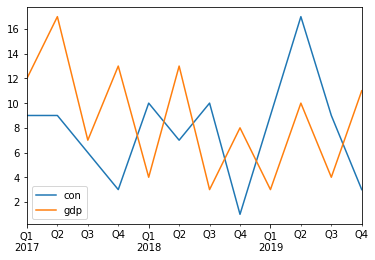

In [ ]:
df.plot()

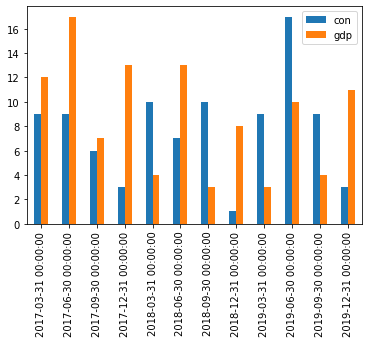

In [ ]:
df.plot.bar()

<Axes: >

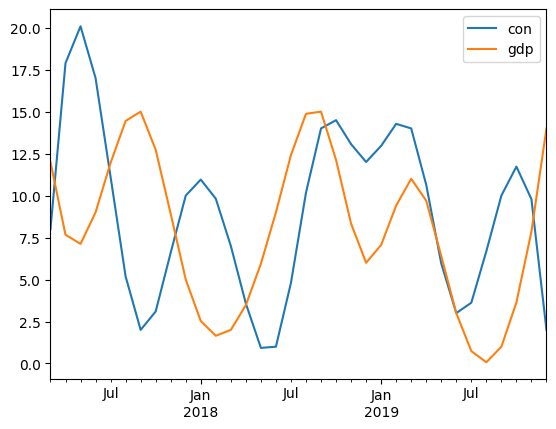

In [122]:
df.resample('M').interpolate(method='cubic').plot() # 누락된 데이터를 추정하여 채움
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

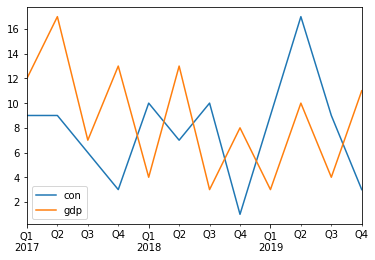

In [ ]:
df.plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

In [141]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})

In [142]:
df

,value,date
0,2,20201201
1,4,2019-9-1
2,5,1 jul 2018
3,6,2017q1


In [143]:
df.date = pd.to_datetime(df.date)

In [144]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [145]:
df = df.set_index('date')

In [146]:
df

,value
date,
2020-12-01,2
2019-09-01,4
2018-07-01,5
2017-01-01,6


In [147]:
df = df.sort_index()
df

,value
date,
2017-01-01,6
2018-07-01,5
2019-09-01,4
2020-12-01,2


- 전기 대비 증가율, 차분 등 함수를 원래 의도대로 적용하기 위해서는 데이터프레임의 데이트타임인덱스가 빠짐없이 순서대로 정렬되어야 함
- date_range()로 전체 샘플기간에 대한 데이터타임인덱스를 생성한 후 데이터프레임의 reindex(index)를 이용하여 적용

In [148]:
df.pct_change()

,value
date,
2017-01-01,NaN
2018-07-01,-0.166667
2019-09-01,-0.200000
2020-12-01,-0.500000


## offsets: YearEnd(), YearBegin(), QuaterEnd(), QuaterBegin(), MonthEnd(), MonthBegin()
- 날짜 표기를 일치시킬 때 사용

In [129]:
from pandas.tseries.offsets import YearEnd, YearBegin, QuarterEnd, QuarterBegin

In [149]:
df.index = df.index + YearEnd()
df

,value
date,
2017-12-31,6
2018-12-31,5
2019-12-31,4
2020-12-31,2


In [150]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.sort_index()

In [151]:
df.index = df.index + QuarterEnd()
df

,value
date,
2017-03-31,6
2018-09-30,5
2019-09-30,4
2020-12-31,2


데이트타임에서 연도, 분기, 월 추출

In [133]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)

In [134]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [135]:
df['month'] = df.date.dt.month

In [136]:
df

,value,date,month
0,2,2020-12-01,12
1,4,2019-09-01,9
2,5,2018-07-01,7
3,6,2017-01-01,1


In [137]:
df['day'] = df.date.dt.day

In [138]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


# save/read

In [155]:
pwd # print working directory

'/content'

In [166]:
import os
os.getcwd()

'/content'

In [ ]:
import os
os.mkdir('pickles')

## to_pickle()

- python에서 매우 효율적임

In [165]:
ls # 현재 디렉토리에 있는 파일과 서브 디렉토리 표시

pickles/  pickless/  sample_data/


In [173]:
os.listdir()

['.config', 'pickles', 'pickless', 'sample_data']

In [170]:
df.to_pickle('pickles/df.pkl')

In [171]:
ls pickles/

df.pkl


In [174]:
os.listdir('pickles')

['df.pkl']

In [175]:
df1 = pd.read_pickle('pickles/df.pkl')

In [176]:
df1

,value
date,
2017-03-31,6
2018-09-30,5
2019-09-30,4
2020-12-31,2


## to_csv()

In [177]:
df.to_csv('df.csv')
df_csv = pd.read_csv('df.csv', index_col=0)

## to_excel()

In [ ]:
writer = pd.ExcelWriter('dfs.xlsx')
df.to_excel(writer,'df')
df1.to_excel(writer,'df1')
df2.to_excel(writer,'df2')
writer.save()

## save multiple dataframes

In [ ]:
dfs = {'df': df, 'df1': df1, 'df2': df2}

In [ ]:
import pickle

In [ ]:
with open('dfs.pkl', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dfs.pkl', 'rb') as handle:
    dfs_pkl = pickle.load(handle)

# matplotlib

In [179]:
%matplotlib inline

<Axes: >

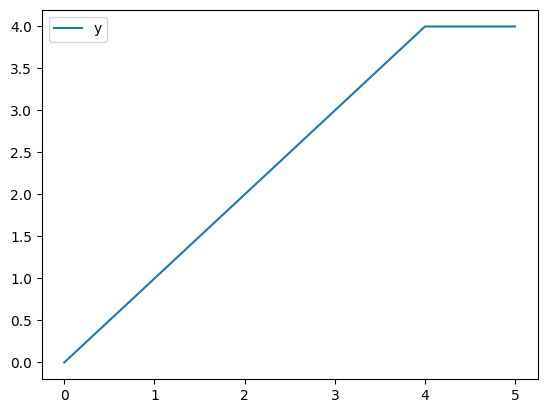

In [180]:
df = pd.DataFrame([0, 1, 2, 3, 4, 4], columns = ['y'])
df.plot()

In [ ]:
# %matplotlib notebook

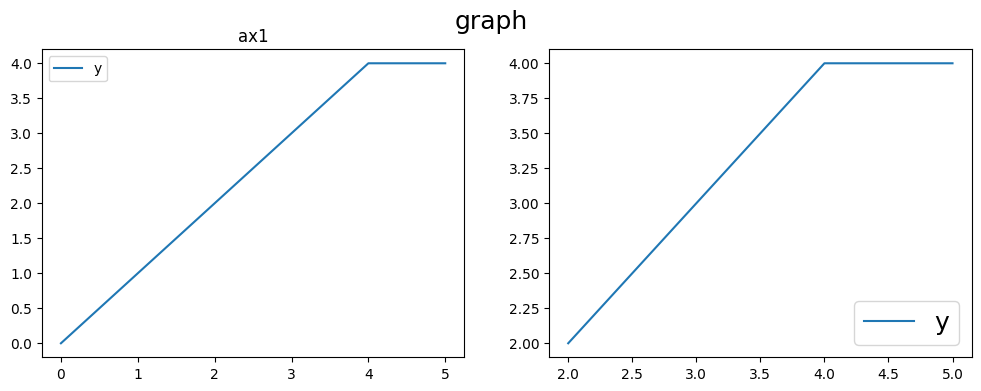

In [181]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

## x, y-axis

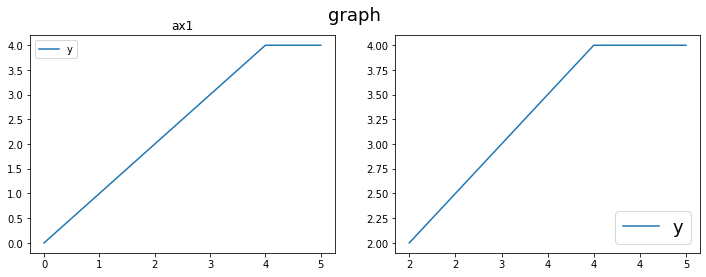

In [ ]:
from matplotlib.ticker import FuncFormatter as FF

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

dp2 = lambda x, p: '{:,.2f}'.format(x)
dp0 = lambda x, p: '{:,.0f}'.format(x)
ax[1].yaxis.set_major_formatter(FF(dp2))
ax[1].xaxis.set_major_formatter(FF(dp0))

<Axes: xlabel='x', ylabel='y'>

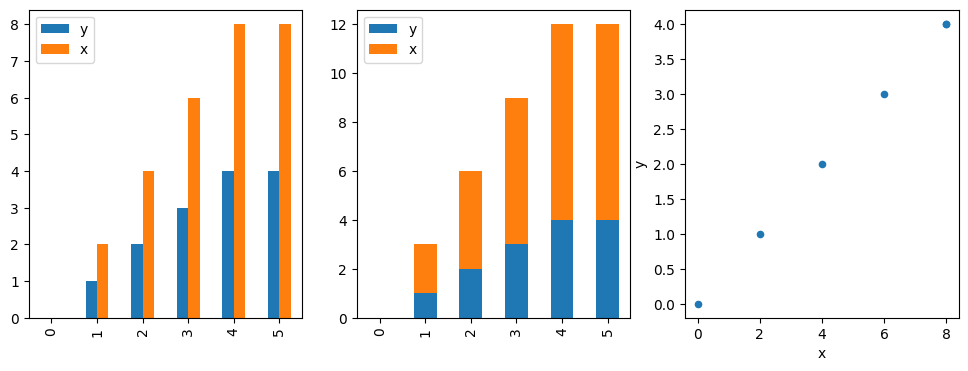

In [182]:
df['x'] = df['y'] * 2

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df.plot.bar(ax=ax[0])
df.plot.bar(stacked=True, ax=ax[1])
df.plot.scatter(x='x', y='y', ax=ax[2])

## bar chart

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'],
                  index = pd.date_range('2017-3-31', '2019-12-31', freq='Q'))

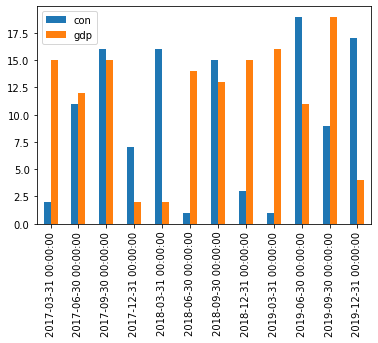

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

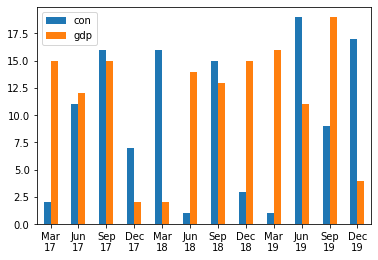

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

ticklabels = [pd.to_datetime(t.get_text()).strftime('%b\n%y') for t in ax.get_xticklabels()]
ax.set_xticklabels(ticklabels, rotation=0);

In [ ]:
def xaxis_date_format(ax, fmt = '%y'):
    '''fmt: '%b\n%y', '%y-%m-%d', etc '''
    ticklabels = [pd.to_datetime(t.get_text()).strftime(fmt) for t in ax.get_xticklabels()]
    ax.set_xticklabels(ticklabels, rotation=0)

## 한글

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [ ]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

나눔글꼴 설치(리눅스)

In [ ]:
!apt-get -y install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,713 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


matplotlib가 사용할 수 있는 폰트 리스트를 재구성하고, 코랩 재시작

In [ ]:
import os

fm._rebuild()
os.kill(os.getpid(), 9)

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [ ]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>,
 <Font 'NanumSquareRound' (NanumSquareRoundB.ttf) normal normal bold normal>,
 <Font 'NanumMyeongjo' (NanumMyeongjoBold.ttf) normal normal bold normal>,
 <Font 'NanumBarunGothic' (NanumBarunGothicBold.ttf) normal normal 700 normal>,
 <Font 'NanumBarunGothic' (NanumBarunGothic.ttf) normal normal 400 normal>,
 <Font 'NanumSquare' (NanumSquareB.ttf) normal normal bold normal>,
 <Font 'NanumGothic' (NanumGothicBold.ttf) normal normal 700 normal>,
 <Font 'NanumSquareRound' (NanumSquareRoundR.ttf) normal normal regular normal>,
 <Font 'NanumSquare' (NanumSquareR.ttf) normal normal regular normal>,
 <Font 'NanumMyeongjo' (NanumMyeongjo.ttf) normal normal 400 normal>]

matplotlib에서 사용하려는 한글 폰트 지정하고, 그래프의 마이너스 라벨이 제대로 표시되도록 설정

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

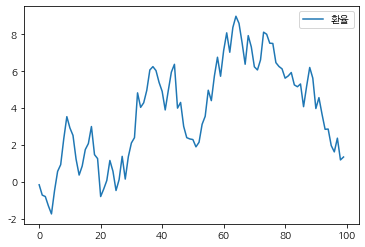

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

# 연습문제

1. 성인 500명에 대한 키(cm)와 몸무게(kg) 데이터를 아래 관계에 따라 데이터프레임으로 생성하시오

$height \sim norm(170, 15)$

$weight = (height - 100){1.2} + u$, $u \sim norm(0, 5)$

2. 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오

3. 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오

h    218.092063
w    141.445865
dtype: float64
h    128.571002
w     36.322297
dtype: float64


<Axes: xlabel='h', ylabel='w'>

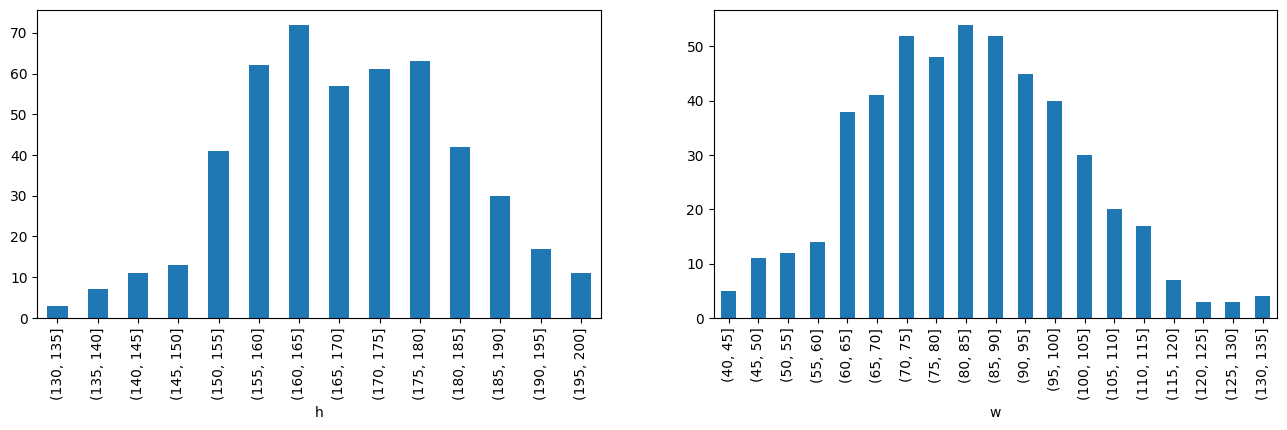

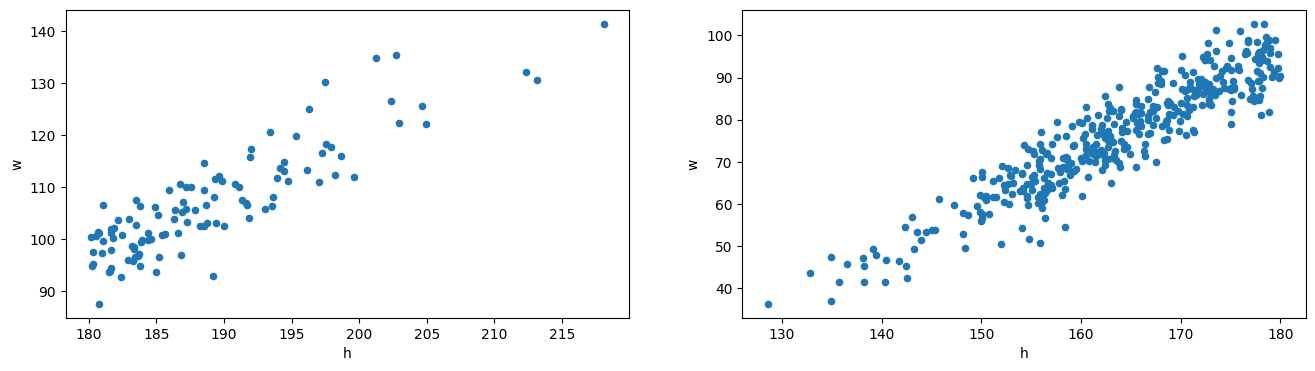

In [186]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#N = 500
#h = np.random.normal(170, 15, N)
#w = (h - 100) * 1.2 + np.random.normal(0, 5, N)

#hw = pd.DataFrame({'h':h, 'w':w})
#print(hw.max())
#print(hw.min())

#fig, ax = plt.subplots(1, 2, figsize=(16, 4))
#hw.groupby(pd.cut(hw.h, list(range(130, 205, 5))))['h'].count().plot.bar(ax=ax[0])
#hw.groupby(pd.cut(hw.w, list(range(40, 140, 5))))['w'].count().plot.bar(ax=ax[1])

#fig, ax = plt.subplots(1, 2, figsize=(16, 4))
#hw.loc[hw.h.ge(180)].plot.scatter(x='h', y='w', ax=ax[0])
#hw.loc[hw.h.lt(180)].plot.scatter(x='h', y='w', ax=ax[1])